<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JersonDavidPerezContreras/blob/main/Activity_Semanal_7_Regresiones_y_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# TECNOLOGICO DE MONTEREY





#Maestria en inteligencia artificial aplicada





##Ciencia y Analitica de datos


##Activity Semanal -- 7 Regresiones y K means



## Profesora:

María de la Paz Rico Fernández





# Presentado por: 

Jerson David Perez Contreras

A01793810

Liga Git: 

https://github.com/PosgradoMNA/actividades-de-aprendizaje-JersonDavidPerezContreras/blob/main/Activity_Semanal_7_Regresiones_y_K_means.ipynb

Ejerccio 1 

Costo en la industria de manufactura. 

Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.


In [131]:


##librereias

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform


# to make this notebook's output stable across runs
np.random.seed(42)

# Cargar Datos

df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')

df.head()




,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [132]:
##VARIABLES INDEPENDIENTES Y  DEPENDIENTES

X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [133]:
##Divide los datos del costo de manufactura. Utiliza la función train_test_split .

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [134]:
##Regresión Lineal.
##Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

regresion = LinearRegression(fit_intercept=True)
regresion.fit(X_train, y_train)

y_val = regresion.predict(X_test)

print('Modelo Y=', regresion.coef_,'X +', regresion.intercept_)

Modelo Y= [-5.98882699] X + 66.83650741226988


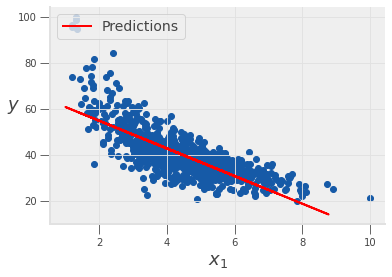

In [135]:
## VISUALIZACION
plt.scatter(X_train, y_train)
plt.plot(X_test, y_val, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [136]:
# los errores

MAES= []
R= []


print('MAE:', metrics.mean_absolute_error(y_test,y_val))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_val)))

#la r cuadrada
print(' r cuadrada:', r2_score(y_test,y_val))

MAES.append(metrics.mean_absolute_error(y_test,y_val))
R.append(r2_score(y_test,y_val))


MAE: 5.013587781954963
RMSE: 7.108963321847682
 r cuadrada: 0.6116251549562579


In [137]:
##Regresión Polinomial.
##Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)


print('Modelo Y=', lin_reg.coef_[0],'X +' , lin_reg.coef_[1],'X^2 +', regresion.intercept_)


Modelo Y= -16.406381017212386 X + 1.1313609537119216 X^2 + 66.83650741226988


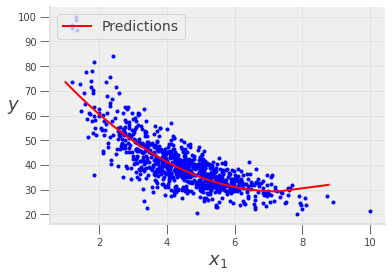

In [138]:
#VISUALISACION

orden = np.argsort(X_test.values.ravel()) 

X_new_poly = poly_features.transform(X_test)
y_new = lin_reg.predict(X_new_poly)


plt.plot(X_train, y_train, "b.")
plt.plot(X_test.values.ravel()[orden] , y_new[orden] , "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


In [139]:
# los errores

print('MAE:', metrics.mean_absolute_error(y_test.values.ravel()[orden] , y_new[orden]))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test.values.ravel()[orden] ,y_new[orden])))

#la r cuadrada
print('r cuadrada',r2_score(y_test.values.ravel()[orden] , y_new[orden]))

MAES.append(metrics.mean_absolute_error(y_test.values.ravel()[orden] , y_new[orden]))
R.append(r2_score(y_test.values.ravel()[orden] , y_new[orden]))


MAE: 4.3833025759681075
RMSE 5.832771301068423
r cuadrada 0.7385501224942536


In [140]:
## Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

## lasso

lasso =  Lasso(alpha=5.0,fit_intercept=True)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print('Modelo Y =', lasso.coef_,'X +', lasso.intercept_)


Modelo Y = [-3.15572458] X + 54.16195119377413


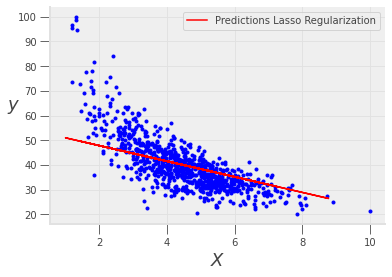

In [141]:
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, y_pred, "r-",label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10)
plt.show()

In [142]:
#errores
print('MAE:', metrics.mean_absolute_error(y_test, np.ravel(y_pred)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, np.ravel(y_pred))))

# rcuadrado
print('r cuadrado',r2_score(y_test, np.ravel(y_pred)))

MAES.append( metrics.mean_absolute_error(y_test, np.ravel(y_pred)))
R.append(r2_score(y_test, np.ravel(y_pred)))


MAE: 5.681207654677401
RMSE: 8.409660991642687
r cuadrado 0.456505036516648


In [143]:
##RIDGE

ridge = Ridge(alpha=5.0,fit_intercept=True) 
ridge.fit(X_train, y_train)

y_val = ridge.predict(X_test)

print('Modelo Y =', ridge.coef_,'X +', ridge.intercept_)

Modelo Y = [-5.97003397] X + 66.75243237759665


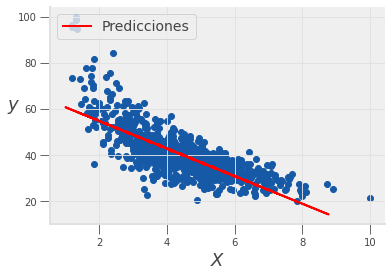

In [144]:
##GRAFICA

plt.scatter(X_train, y_train)
plt.plot(X_test, y_val, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [145]:
#ERRORES
print('MAE:', metrics.mean_absolute_error(y_test, np.ravel(y_val)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, np.ravel(y_val))))

# r cuadrado
print('r cuadrado',r2_score(y_test, np.ravel(y_val)))



MAES.append(metrics.mean_absolute_error(y_test, np.ravel(y_val)))
R.append(r2_score(y_test, np.ravel(y_val)))

MAE: 5.0162057389928325
RMSE: 7.1111119498200965
r cuadrado 0.6113903530239646


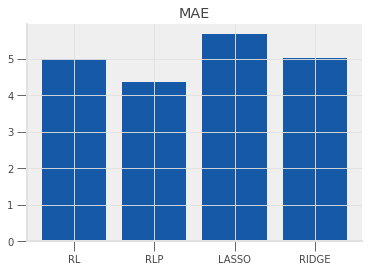

In [146]:
##Finalmente grafica :
##MAE (de los cuatro métodos)
##R2 (de los cuatro métodos)

#MAE

nombres=['RL', 'RLP','LASSO','RIDGE']

MAES

plt.bar(nombres, MAES)
plt.title("MAE")
plt.show()


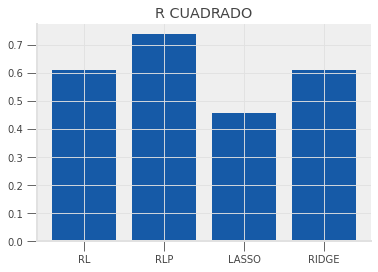

In [147]:
plt.bar(nombres, R)
plt.title("R CUADRADO")
plt.show()

#Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

Dada las metricas de MAE Y R Cuadrado, el modelo polomial es el mas adecuado, debido a que tiene un menor error y su r2 es mayor a los demas modelos. la base se utilizo 80% de los datos para entrenamiento y 10% de validacion.
el mejor modelo se trabajo con 2 grados obtiendo asi un error de 4.32% siendo este el mejor modelo.

Como conclusion, siempre es importante evaluar varios metodos de prediccion y revisar sus paramentros, esto debido, dependiendo de los datos y el objetivo que se busca, cada uno de los modelos se puede adapatar mejor a cada situación.



#Notebook 2. K means. 

In [148]:


! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import qeds
from shapely.geometry import Point

In [150]:
# IMPORTAR DATOS
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

In [151]:
## longitudes y latitudes

latlong=df[["latitude","longitude"]]

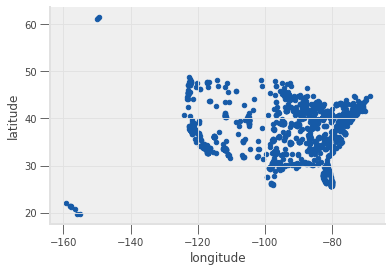

In [152]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [153]:
## librerias geograficas

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import qeds
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [154]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [155]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [156]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


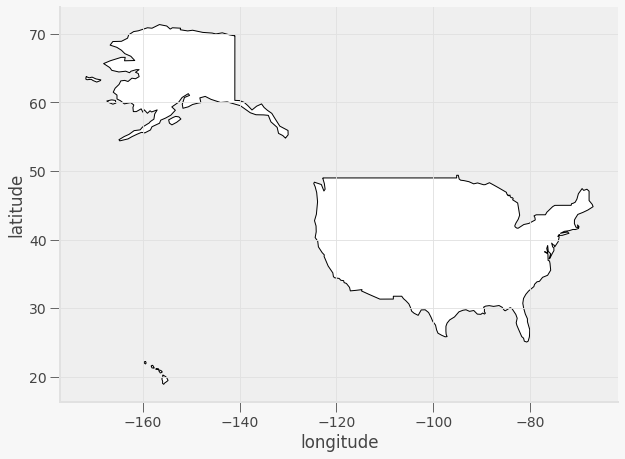

In [157]:
#MAPA
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

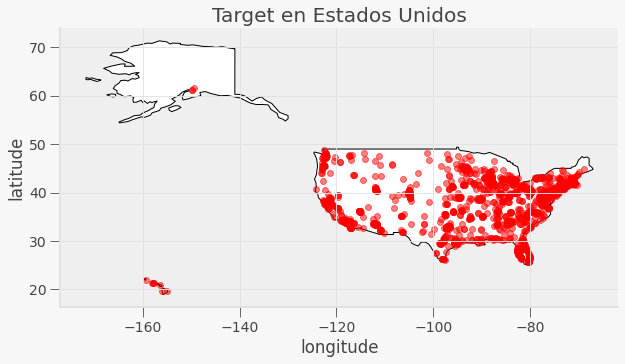

In [158]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?
¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.

In [166]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=50)

kmeans.fit(latlong)
y_kmeans = kmeans.predict(latlong)

centro = kmeans.cluster_centers_ 

dfcentro = pd.DataFrame(centro)
dfcentro["Coordinates"] = list(zip(centro[:, 1], centro[:, 0]))
dfcentro["Coordinates"] = dfcentro["Coordinates"].apply(Point)


gdf_C = gpd.GeoDataFrame(dfcentro, geometry="Coordinates")  
gdf_C

,0,1,Coordinates
0,43.338060,-89.438563,POINT (-89.43856 43.33806)
1,33.795171,-117.799448,POINT (-117.79945 33.79517)
2,35.891690,-78.913933,POINT (-78.91393 35.89169)
3,32.871325,-96.912072,POINT (-96.91207 32.87133)
4,20.945428,-157.312251,POINT (-157.31225 20.94543)
5,40.124258,-75.169885,POINT (-75.16988 40.12426)
6,26.230645,-80.316394,POINT (-80.31639 26.23065)
7,45.180188,-122.718479,POINT (-122.71848 45.18019)
8,39.892450,-105.108015,POINT (-105.10802 39.89245)
9,36.003139,-83.292212,POINT (-83.29221 36.00314)


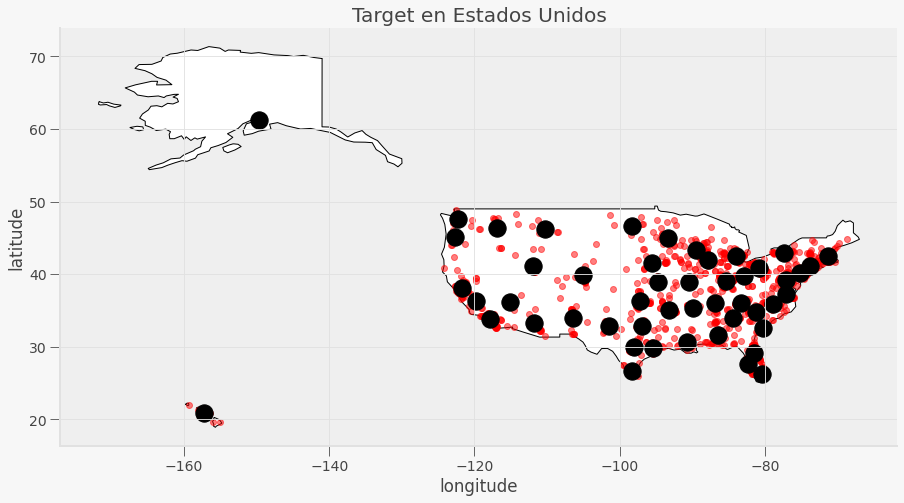

In [167]:
fig, gax = plt.subplots(figsize=(15,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')
gdf.plot(ax=gax, color='red', alpha = 0.5) 
gdf_C.plot(ax=gax, color='black', alpha = 1, markersize = 300) 
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [168]:
kmeans.inertia_ ## DISTANCIA DE LA TIENDA AL ALMACEN MAS CERCANO

1814.8714689462374

#conclusiones

Libreriass usadas:

import geopandas as gpd:

facilitar el trabajo con datos geoespaciales en python. Combina las capacidades de pandas y shapely, proporcionando operaciones geoespaciales en pandas y una interfaz de alto nivel para múltiples geometrías a shapely

import qeds:

Este paquete proporciona una interfaz simplificada para los conjuntos de datos que utilizamos con frecuencia

from sklearn.cluster import KMeans

from shapely.geometry import Point:

Manipulación y análisis de objetos geométricos en el plano cartesiano

¿Consideras importante que se grafique en un mapa?, ¿por qué?

Una grafica de solo puntos, no nos genera ninguna informacion relevante, mientras se aterrizan a un mapa, ya podemos ver de manera mas visual como se estan comportando los datos, especialmente las ubicaciones y concentraciones de las tiendas.


se van a surtir un total de 1839 tiendas, al ser una empresa grande y al estar dividida estados unidos por condados se elige un total de 50 almacenes, esto nos permite tener un promedio de  37 tiendas por almacen. y para los tiempos y logisticas es necesario ser en el menor tiempo y menor recorrido. para este ejercicio se tiene una distanciua cuadrada de 1802  entre la tienda y el almacen. 



